# `TEAM 2 OF AIM4B`
 Group Members: Sander Van Duin, Ali Kalantari Khandani, Owen Alberts, Patrik Nasrallah

## `Business Question`:  How can advanced predictive modeling techniques enhance a car dealership's decision-making process in inventory selection and pricing to maximize profitability?
####  `Sub Questions`:
- How do Random Forest and Neural Network models perform in predicting car selling prices based on selected features?
- How do specific vehicle characteristics such as body type, color, and region contribute to the accuracy of the predictive models in determining the most profitable cars for the dealership?
- How does the inclusion of Manheim Market Report (MMR) data impact the predictive accuracy of models in estimating the selling price of cars in the dealership's inventory?
- Is it feasible for a car dealership to make informed inventory and pricing decisions based on a limited set of variables? What are the trade-offs in using a more focused versus a more comprehensive set of attributes for prediction?

### 1. Exploratory Data Analysis (EDA) for the car_prices Dataset

This section contains the EDA for the `car_prices` dataset, which is the initial step of our AI assignment. The analysis includes data cleaning, handling missing values, and a variety of visualizations to uncover insights and patterns within the data. The visualizations cover distributions, correlations, and time-series analysis, which are critical to understand before applying supervised machine learning models.


### 1.1 Importing Necessary Libraries

In this initial step, we import all the Python libraries required for this project. Each library has a specific role:

- `os`: Provides a way of using operating system dependent functionality, such as reading or writing to a filesystem. This is crucial for file management tasks in the project.
- `pandas`: Essential for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series, which are central to handling and processing the car prices dataset.
- `numpy`: Adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. This library is key for numerical computations.
- `scipy.stats`: Part of SciPy, used for statistical tests and data exploration. It's essential for performing statistical analyses and hypothesis testing within the project.
- `matplotlib.pyplot`: A plotting library that provides a MATLAB-like interface, used for making a wide variety of static, animated, and interactive plots. This is important for data visualization and understanding data distributions and relationships.
- `seaborn`: Based on matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics. It enhances the visual appeal of plots, making them more readable and insightful.
- `dateutil.parser`: Useful for parsing dates in various string formats. It allows for easy conversion of date and time data into Python datetime objects, which is crucial for handling time series data effectively in this project.

These libraries form the foundation for various data analysis, data manipulation, statistical analysis, and data visualization tasks that will be performed in this project.


In [1]:
#Importing all the libraries needed for this project
import os
import pandas as pd
import numpy as np  
import scipy.stats as stats
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

### 1.2 Setting Up the Working Directory and Loading the Dataset

This section of the code is focused on setting up the working directory and loading the dataset into a pandas DataFrame.

1. **Setting the Working Directory**: We first specify the path to the directory containing our dataset and set it as the current working directory. This is crucial for easy access to the dataset and related files.

2. **Loading the Dataset**: The dataset, stored as a CSV file, is loaded into a pandas DataFrame. Any problematic lines encountered during loading are skipped, ensuring smooth loading of the data.

The DataFrame `car_df` is then used to represent the car prices dataset, which will be the focus of our subsequent analysis. The first few rows of the DataFrame are displayed to provide an initial glimpse of the data structure and contents.

In [2]:
# Set the path to the directory containing the dataset
path = r"C:\Users\alika\Downloads\AI4B\Assignment"
# Change the current working directory to the specified path
os.chdir(path)
# List files in the 'car' subdirectory to verify the presence of the dataset
os.listdir(os.path.join('car'))

# Construct the file path for the car prices dataset
car_path = os.path.join("car" , "car_prices.csv")
# Load the dataset from the specified path into a pandas DataFrame
# 'on_bad_lines="skip"' is used to handle any problematic lines during loading
car_df = pd.read_csv(car_path, on_bad_lines="skip")
# Display the first few rows of the DataFrame for a preliminary look at the data
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### 1.3 Analyzing Missing Values in the Dataset

This section is dedicated to analyzing missing values in the `car_df` DataFrame. Understanding the extent and distribution of missing data is critical for making informed decisions on data cleaning and preprocessing.

1. **Counting Missing Values**: We calculate the number of missing values in each column of the DataFrame. This step helps in identifying which columns have missing data and the extent of it.
2. **Detailed Column Analysis**: 
    - A more detailed analysis is performed on each column to determine the percentage of missing values.
    - This analysis involves creating a new DataFrame `column_analysis` that includes the column names, the count of missing values, and the percentage of missing values.
    - The resulting DataFrame is sorted in descending order of missing values to prioritize columns with the most significant amount of missing data.

The outcome of this analysis will guide the strategies for handling missing values, ensuring the integrity and quality of the data for further analysis.


In [3]:
null_counts = car_df.isnull().sum()
# Analyzing the columns to provide recommendations for handling missing values
column_analysis = car_df.isnull().sum().reset_index()
column_analysis.columns = ['Column', 'MissingValues']
column_analysis['PercentageMissing'] = (column_analysis['MissingValues'] / len(car_df)) * 100
column_analysis.sort_values(by='MissingValues', ascending=False)


,Column,MissingValues,PercentageMissing
5,transmission,65353,11.695010
4,body,13195,2.361263
8,condition,11794,2.110553
3,trim,10651,1.906011
2,model,10399,1.860915
1,make,10301,1.843378
10,color,749,0.134035
11,interior,749,0.134035
9,odometer,94,0.016821
0,year,0,0.000000


### 1.4: Imputation of Missing Values in Various Columns

In this step, we address the issue of missing values in multiple columns of the car dataset. Our approach is to impute these missing values based on the most common value for each make and model combination. This process involves:

1. **Analysis of Existing Data**: Analyze the existing non-null data in each column to find the most common value for each combination of make and model.

2. **Imputation Process**:
    - For rows with a missing value in `transmission`, `body`, `make`, `model`, `trim`, `condition`, `color`, and `interior`, look up the most common value for their respective make and model.
    - If the make and model combination has a clear most common value, use it to fill the missing value.
    - If the combination is not present or doesn't have a predominant value, the missing value remains.

3. **Outcome Assessment**:
    - Assess the outcome by calculating the percentage of remaining missing values in each column after the imputation process.

This method provides a consistent approach to handling missing data across various types of columns, ensuring a more reliable dataset for further analysis.


In [4]:
# Define a general function for imputation based on the most common value in a column
def impute_missing_values(df, column_name):
    # Filter out rows where the column is not null
    column_not_null = df[df[column_name].notnull()]

    # Find the most common value for each make and model
    most_common_value = column_not_null.groupby(['make', 'model'])[column_name].agg(lambda x: x.value_counts().idxmax())

    # Impute missing values
    df[column_name] = df.apply(lambda row: most_common_value.get((row['make'], row['model'])) if pd.isnull(row[column_name]) else row[column_name], axis=1)

    # Calculate the percentage of remaining missing values
    remaining_missing = df[column_name].isnull().sum() / len(df) * 100
    return remaining_missing

# Columns to impute
columns_to_impute = ['transmission', 'body', 'make', 'model', 'trim', 'condition', 'color', 'interior']

# Applying imputation and printing the remaining missing values percentage for each column
for column in columns_to_impute:
    remaining_missing_percentage = impute_missing_values(car_df, column)
    print(f"Remaining missing values in {column}: {remaining_missing_percentage:.2f}%")


Remaining missing values in transmission: 0.33%
Remaining missing values in body: 2.36%
Remaining missing values in make: 1.84%
Remaining missing values in model: 1.86%


C:\Users\alika\AppData\Local\Temp\ipykernel_11128\210009927.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[column_name] = df.apply(lambda row: most_common_value.get((row['make'], row['model'])) if pd.isnull(row[column_name]) else row[column_name], axis=1)


Remaining missing values in trim: 0.03%


C:\Users\alika\AppData\Local\Temp\ipykernel_11128\210009927.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[column_name] = df.apply(lambda row: most_common_value.get((row['make'], row['model'])) if pd.isnull(row[column_name]) else row[column_name], axis=1)


Remaining missing values in condition: 0.00%


C:\Users\alika\AppData\Local\Temp\ipykernel_11128\210009927.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[column_name] = df.apply(lambda row: most_common_value.get((row['make'], row['model'])) if pd.isnull(row[column_name]) else row[column_name], axis=1)


Remaining missing values in color: 0.00%


C:\Users\alika\AppData\Local\Temp\ipykernel_11128\210009927.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[column_name] = df.apply(lambda row: most_common_value.get((row['make'], row['model'])) if pd.isnull(row[column_name]) else row[column_name], axis=1)


Remaining missing values in interior: 0.00%


### EXPLAINING RESULTS: Assessment of Imputation Results and Further Data Cleaning

Following the imputation process in Step 1.4, we have significantly reduced the number of missing values in various columns. Here's a comparison of the results before and after the imputation:

#### Before Imputation:
- Transmission: 11.70% missing
- Body: 2.36% missing
- Make: 1.84% missing
- Model: 1.86% missing
- Trim: 1.91% missing
- Condition: 2.11% missing
- Color: 0.13% missing
- Interior: 0.13% missing

#### After Imputation:
- Transmission: 0.33% missing
- Body: 2.36% missing
- Make: 1.84% missing
- Model: 1.86% missing
- Trim: 0.03% missing
- Condition: 0.00% missing
- Color: 0.00% missing
- Interior: 0.00% missing

The imputation process has been particularly effective for columns like `trim`, `condition`, `color`, and `interior`, reducing the missing values to near zero. However, a small percentage of missing values still persists in some columns.


### 1.5. Further Data Cleaning

In this step, we focus on further data cleaning by removing any remaining rows with missing values:

1. **Deleting Rows with Missing Values**:
   - We use the `dropna()` method on the `car_df` DataFrame to create a new DataFrame `car_df_cleaned`. This method removes any rows that contain missing values.
   - This step ensures that the dataset used for analysis and model building is free from missing data, which could otherwise bias or invalidate the results.

2. **Checking the Shape of the Cleaned Dataset**:
   - We print the shape of `car_df_cleaned` to understand the impact of deleting rows on our dataset size. This gives us an idea of how many rows were removed due to missing values.

3. **Verifying the Absence of Missing Values**:
   - Finally, we check for missing values in the cleaned dataset by summing up all the missing values across all columns. 
   - The output "Total missing values in the cleaned dataset" confirms whether the dataset is now completely free of missing data.

In [5]:
# Deleting rows with any missing values
car_df_cleaned = car_df.dropna()

# Checking the shape of the dataset after deletion
print("Shape of dataset after removing rows with missing values:", car_df_cleaned.shape)

# Summing the missing values across all columns in the cleaned dataset
total_missing_values = car_df_cleaned.isnull().sum().sum()
print("Total missing values in the cleaned dataset:", total_missing_values)

Shape of dataset after removing rows with missing values: (545445, 16)
Total missing values in the cleaned dataset: 0


## 1.5. Cleaning the Dataset and converting categorical variabels
### 1.5.1 Standardizing Body Type Categories

In this step, we focus on standardizing the body type categories in our dataset:

1. **Defining the Mapping Function**:
   - A function `map_body_type` is defined to map various body type descriptions to a set of standardized categories. This function takes a single argument, `body_type`.
   - Inside the function, we first check if the input is a string. If it is, we convert it to lowercase to standardize the format.
   - We then use conditional statements to map various descriptions of body types to one of eight predefined categories: 'Sedan', 'SUV', 'Hatchback', 'Coupe', 'Van', 'Cab', 'Wagon', or 'Others'.
   - This categorization simplifies the variety of descriptions into broader, more general categories, making the data easier to analyze and visualize.

2. **Applying the Mapping Function**:
   - The `map_body_type` function is applied to the 'body' column of the `car_df_cleaned` DataFrame using the `apply` method.
   - This step effectively transforms the 'body' column, ensuring that each vehicle is categorized into one of the standardized body type categories.

In [6]:
# Function to map body types to 8 categories
def map_body_type(body_type):
    # Check if the value is a string
    if isinstance(body_type, str):
        body_type = body_type.lower()  # Standardize to lowercase
        if 'sedan' in body_type:
            return 'Sedan'
        elif 'suv' in body_type:
            return 'SUV'
        elif 'hatchback' in body_type:
            return 'Hatchback'
        elif 'coupe' in body_type or 'g37 coupe' in body_type:
            return 'Coupe'
        elif 'van' in body_type or 'ram van' in body_type:
            return 'Van'
        elif 'cab' in body_type or 'cab plus 4' in body_type:
            return 'Cab'
        elif 'wagon' in body_type or 'cts-v wagon' in body_type or 'cts wagon' in body_type:
            return 'Wagon'
    # Return 'Others' for non-string or missing values
    return 'Others'

# Apply the mapping to the 'body' column
car_df_cleaned['body'] = car_df_cleaned['body'].apply(map_body_type)


C:\Users\alika\AppData\Local\Temp\ipykernel_11128\3347020317.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df_cleaned['body'] = car_df_cleaned['body'].apply(map_body_type)


## Other Cleaning Steps
### 1.5.2 Removing Duplicates
To ensure data integrity, we remove any duplicate entries in the dataset. Duplicate records can lead to skewed analysis, so it's essential to eliminate them to maintain accuracy.

### 1.5.3 Encoding Transmission Data
The 'transmission' column is encoded to facilitate numerical analysis: we assign '0' to manual transmissions and '1' to automatic transmissions. This encoding is vital for machine learning models which require numerical input.

### 1.5.4 Geographical Region Mapping
We convert state/province codes into broader geographical regions. This categorization simplifies regional analysis and introduces a numerical coding system for each region:
   - 'Northeast': 0
   - 'Midwest': 1
   - 'South': 2
   - 'West': 3
   - 'Canada': 4
These numerical representations are essential for analysis that involves geographical factors.

### 1.5.5 Dropping Unnecessary Columns
To streamline our dataset for the analysis, we remove columns that are not relevant to our study. This includes columns like 'trim', 'model', 'vin', 'interior', 'seller', 'state', etc. This step helps focus our analysis on the most impactful data features.

### 1.5.6 Encoding Color Column
We categorize and encode the color of the cars into distinct numerical codes for simplified analysis. This includes:
   - 'Black': 0
   - 'White': 1
   - 'Silver' and 'Grey' (combined as "Steel"): 2
   - Other colors (grouped as "Polychrome"): 3
This encoding aids in reducing the complexity of color data for analytical modeling.

### 1.5.7 Encoding Body Type Column
The 'body' column is standardized by categorizing different vehicle body types into a uniform set of categories, each assigned a specific numerical code:
   - 'Sedan': 0
   - 'SUV': 1
   - 'Hatchback': 2
   - 'Coupe': 3
   - 'Van': 4
   - 'Cab': 5
   - 'Wagon': 6
   - 'Others': 7
This categorization and encoding facilitate the consistent analysis of vehicle body types.


In [7]:
# 1.5.2 Removing duplicates from the cleaned dataset
car_df_cleaned = car_df_cleaned.drop_duplicates()

# 1.5.3 Encoding Transmission Data
car_df_cleaned['transmission'] = car_df_cleaned['transmission'].apply(lambda x: 0 if x == 'manual' else 1)

# 1.5.4 Geographical Region Mapping
# Define a mapping from state/province codes to geographical regions.
code_to_region = {
    'ma': 'Northeast', 'nj': 'Northeast', 'ny': 'Northeast', 'pa': 'Northeast',
    'il': 'Midwest', 'in': 'Midwest', 'mn': 'Midwest', 'mo': 'Midwest', 'oh': 'Midwest', 'wi': 'Midwest',
    'al': 'South', 'az': 'South', 'fl': 'South', 'ga': 'South', 'la': 'South', 'md': 'South', 
    'ms': 'South', 'nc': 'South', 'ok': 'South', 'sc': 'South', 'tn': 'South', 'tx': 'South', 'va': 'South',
    'ca': 'West', 'co': 'West', 'hi': 'West', 'nv': 'West', 'nm': 'West', 'or': 'West', 'ut': 'West', 'wa': 'West',
    'ab': 'Canada', 'ns': 'Canada', 'on': 'Canada', 'qc': 'Canada'
}
# Apply the mapping to the 'state' column, categorizing each car into a region.
car_df_cleaned['region'] = car_df_cleaned['state'].apply(lambda x: code_to_region.get(x.lower(), 'Other'))
# Define a numerical encoding for each region for efficient data processing.
region_mapping = {
    'Northeast': 0, 'Midwest': 1, 'South': 2, 'West': 3, 'Canada': 4
}
# Apply the numerical encoding to the 'region' column.
car_df_cleaned['region'] = car_df_cleaned['region'].map(region_mapping)
# Dropping rows where 'region' is NaN
car_df_cleaned.dropna(subset=['region'], inplace=True)

# 1.5.5 Dropping Unnecessary Columns
columns_to_drop = ['trim', 'model', 'vin', 'interior', 'seller', 'state']
car_df_cleaned = car_df_cleaned.drop(columns=columns_to_drop)

# 1.5.6 Encoding Color Column
# Define a mapping for color encoding.
color_mapping = {
    'black': 0, 'white': 1, 'silver': 2, 'grey': 2,  # Silver and grey merged as "Steel"
    # Other colors categorized as "Polychrome"
}
# Apply color encoding.
car_df_cleaned['color'] = car_df_cleaned['color'].apply(lambda x: color_mapping.get(x.lower(), 3))

# 1.5.7 Encoding Body Type Column
# Define the mapping function for categorizing body types.
def map_body_type(body_type):
    if pd.notna(body_type) and isinstance(body_type, str):
        body_type = body_type.lower().strip()
        if 'sedan' in body_type:
            return 'Sedan'
        elif 'suv' in body_type:
            return 'SUV'
        elif 'hatchback' in body_type:
            return 'Hatchback'
        elif 'coupe' in body_type or 'g37 coupe' in body_type:
            return 'Coupe'
        elif 'van' in body_type or 'ram van' in body_type:
            return 'Van'
        elif any(cab_keyword in body_type for cab_keyword in ['cab', 'cab plus 4']):
            return 'Cab'
        elif any(wagon_keyword in body_type for wagon_keyword in ['wagon', 'cts-v wagon', 'cts wagon']):
            return 'Wagon'
        else:
            return 'Others'
    else:
        return 'Others'
# Apply the mapping to the 'body' column.
car_df_cleaned['body'] = car_df_cleaned['body'].apply(map_body_type)
# Define the numerical mapping for the categorized body types.
body_type_mapping = {
    'Sedan': 0, 'SUV': 1, 'Hatchback': 2, 'Coupe': 3, 'Van': 4, 'Cab': 5, 'Wagon': 6, 'Others': 7
}
# Apply the numerical encoding to the 'body' column.
car_df_cleaned['body'] = car_df_cleaned['body'].map(body_type_mapping)

# Display the first few rows of the updated DataFrame for a quick review of the changes.
car_df_cleaned.head()

,year,make,body,transmission,condition,odometer,color,mmr,sellingprice,saledate,region
0,2015,Kia,1,1,5.0,16639.0,1,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.0
1,2015,Kia,1,1,5.0,9393.0,1,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.0
2,2014,BMW,0,1,4.5,1331.0,3,31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),3.0
3,2015,Volvo,0,1,4.1,14282.0,1,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),3.0
4,2014,BMW,0,1,4.3,2641.0,3,66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),3.0


## Final Steps in Cleaning
### 1.5.8 Parsing and Formatting 'saledate' Column
This step involves processing the 'saledate' column to ensure the dates are in a consistent and usable format:
   - A custom function `parse_date` is defined to convert date strings into a standardized YYYY-MM-DD format. This function uses the `dateutil.parser` to handle various date string formats robustly.
   - The function includes error handling to return `None` for any unparseable dates, ensuring the robustness of the data transformation process.
   - We apply this function to the 'saledate' column, and then convert the results to Pandas' datetime format, facilitating further time-series analyses and operations.

### 1.5.9 Calculating Car Age
Understanding the age of cars in the dataset is crucial for various analyses:
   - We create a new column 'car_age' by subtracting the car's manufacturing year (from the 'year' column) from the year part of the 'saledate'. This calculation provides the age of the car at the time of sale.
   - We increment the 'car_age' by 1 to account for the current year, as the difference in years alone might underestimate the car's age.
   - The columns 'year' and 'saledate' are then dropped, as their information is now encapsulated in the 'car_age' column.
   - We filter out cars with a non-positive age to maintain data integrity.

### 1.5.10 Calculating Average Annual Mileage
This step aims to gain insights into how much each car has been used:
   - We calculate the 'average_annual_mileage' for each car by dividing its 'odometer' reading by its 'car_age'. This metric provides a sense of how intensively the car has been driven each year.
   - This feature can be particularly useful for understanding wear and tear relative to the car's age, as well as for identifying outliers or anomalies in usage patterns.

### 1.5.11 Creating COA Score
The Condition Over Age (COA) score is an innovative metric derived from the dataset:
   - We calculate the 'coa_score' as the ratio of the car's condition rating to its age. This score helps normalize the condition by considering how long the car has been in use.
   - A higher COA score can indicate a car that has maintained good condition despite its age, potentially revealing well-maintained or less-used vehicles.
   - This metric adds a valuable dimension to the analysis, enabling a more nuanced understanding of the relationship between a car's age, condition, and value.


In [8]:
# 1.5.8 Parsing and Formatting 'saledate' Column
# Custom function to parse the date string and return it in YYYY-MM-DD format
def parse_date(date_str):
    try:
        return parser.parse(date_str).date()  # Parse and return just the date part
    except ValueError:
        return None  # Return None if parsing fails

car_df_cleaned['saledate'] = car_df_cleaned['saledate'].apply(parse_date)  # Apply the function
car_df_cleaned['saledate'] = pd.to_datetime(car_df_cleaned['saledate'], format='%Y-%m-%d', errors='coerce')  # Set as date type

# 1.5.9 Calculating Car Age
# Create a new column 'car_age' as the difference in years between 'saledate' and 'year'
car_df_cleaned['car_age'] = car_df_cleaned['saledate'].dt.year - car_df_cleaned['year']
car_df_cleaned['car_age'] += 1  # Increment all values by 1
car_df_cleaned = car_df_cleaned.drop(columns=['year', 'saledate'])  # Drop unneeded columns
car_df_cleaned = car_df_cleaned[car_df_cleaned['car_age'] > 0]  # Keep rows with positive 'car_age'

# 1.5.10 Calculating Average Annual Mileage
# Avoid division by zero and calculate average annual mileage
car_df_cleaned['average_annual_mileage'] = car_df_cleaned['odometer'] / car_df_cleaned['car_age']

# 1.5.11 Creating COA Score
# Calculate COA (Condition Over Age) Score
car_df_cleaned['coa_score'] = car_df_cleaned['condition'] / car_df_cleaned['car_age']

# Displaying the DataFrame to verify changes
car_df_cleaned.head(20)


,make,body,transmission,condition,odometer,color,mmr,sellingprice,region,car_age,average_annual_mileage,coa_score
2,BMW,0,1,4.5,1331.0,3,31900,30000,3.0,2,665.5,2.25
3,Volvo,0,1,4.1,14282.0,1,27500,27750,3.0,1,14282.0,4.1
4,BMW,0,1,4.3,2641.0,3,66000,67000,3.0,1,2641.0,4.3
6,BMW,0,1,3.4,14943.0,0,69000,65000,3.0,1,14943.0,3.4
7,Chevrolet,0,1,2.0,28617.0,0,11900,9800,3.0,1,28617.0,2.0
8,Audi,0,1,4.2,9557.0,1,32100,32250,3.0,1,9557.0,4.2
9,Chevrolet,7,1,3.0,4809.0,3,26300,17500,3.0,2,2404.5,1.5
10,Audi,0,1,4.8,14414.0,0,47300,49750,3.0,1,14414.0,4.8
12,Ford,0,1,2.0,5559.0,1,15350,12000,3.0,1,5559.0,2.0
14,Chevrolet,0,1,4.0,15686.0,3,13900,10600,3.0,1,15686.0,4.0


## 1.6.1 Data Visualization using Seaborn and Matplotlib

In this part of our analysis, we delve into the dataset to visualize key aspects of car data. We employ a 3x4 subplot grid to explore various dimensions:

1. **Make Distribution**: This count plot displays the distribution of different car makes, focusing on the top 15 most frequent ones. It provides insights into the most common car brands in our dataset.
2. **Body Type Distribution**: Here we analyze the diversity of car body types. The plot helps in understanding the popularity of different body types among the cars.
3. **Transmission Type Distribution**: This visualization showcases the frequency of various transmission types in the dataset, revealing common trends in transmission preferences.
4. **Condition Distribution**: A histogram that depicts the condition of cars. It is useful to assess the general state of vehicles in the dataset.
5. **Odometer Distribution**: This plot illustrates the distribution of odometer readings, giving an idea of how much the cars have been used.
6. **Color Distribution**: A count plot that represents the frequency of different car colors, showing which colors are more prevalent.
7. **MMR Distribution**: A histogram of the Market Value (MMR) of cars. It's helpful for understanding the range of car values in the market.
8. **Selling Price Distribution**: This plot visualizes the distribution of selling prices, offering insights into the price range of cars in the dataset.
9. **Region Distribution**: A count plot that illustrates the distribution of cars across different regions, indicating geographical trends in car availability or popularity.
10. **Car Age Distribution**: We use a histogram to show the age distribution of cars, which can be insightful for understanding the distribution of new versus old cars.
11. **Mileage Distribution**: This histogram portrays the distribution of average annual mileage, providing an understanding of how much cars are typically driven each year.
12. **Condition over Age Distribution**: A unique plot that combines car condition with age, offering insights into how the condition of cars varies with their age.

Each of these visualizations is designed to shed light on specific aspects of the car dataset, helping us draw meaningful conclusions about the characteristics of the vehicles.

Text(0.5, 1.0, 'Condition over Age')

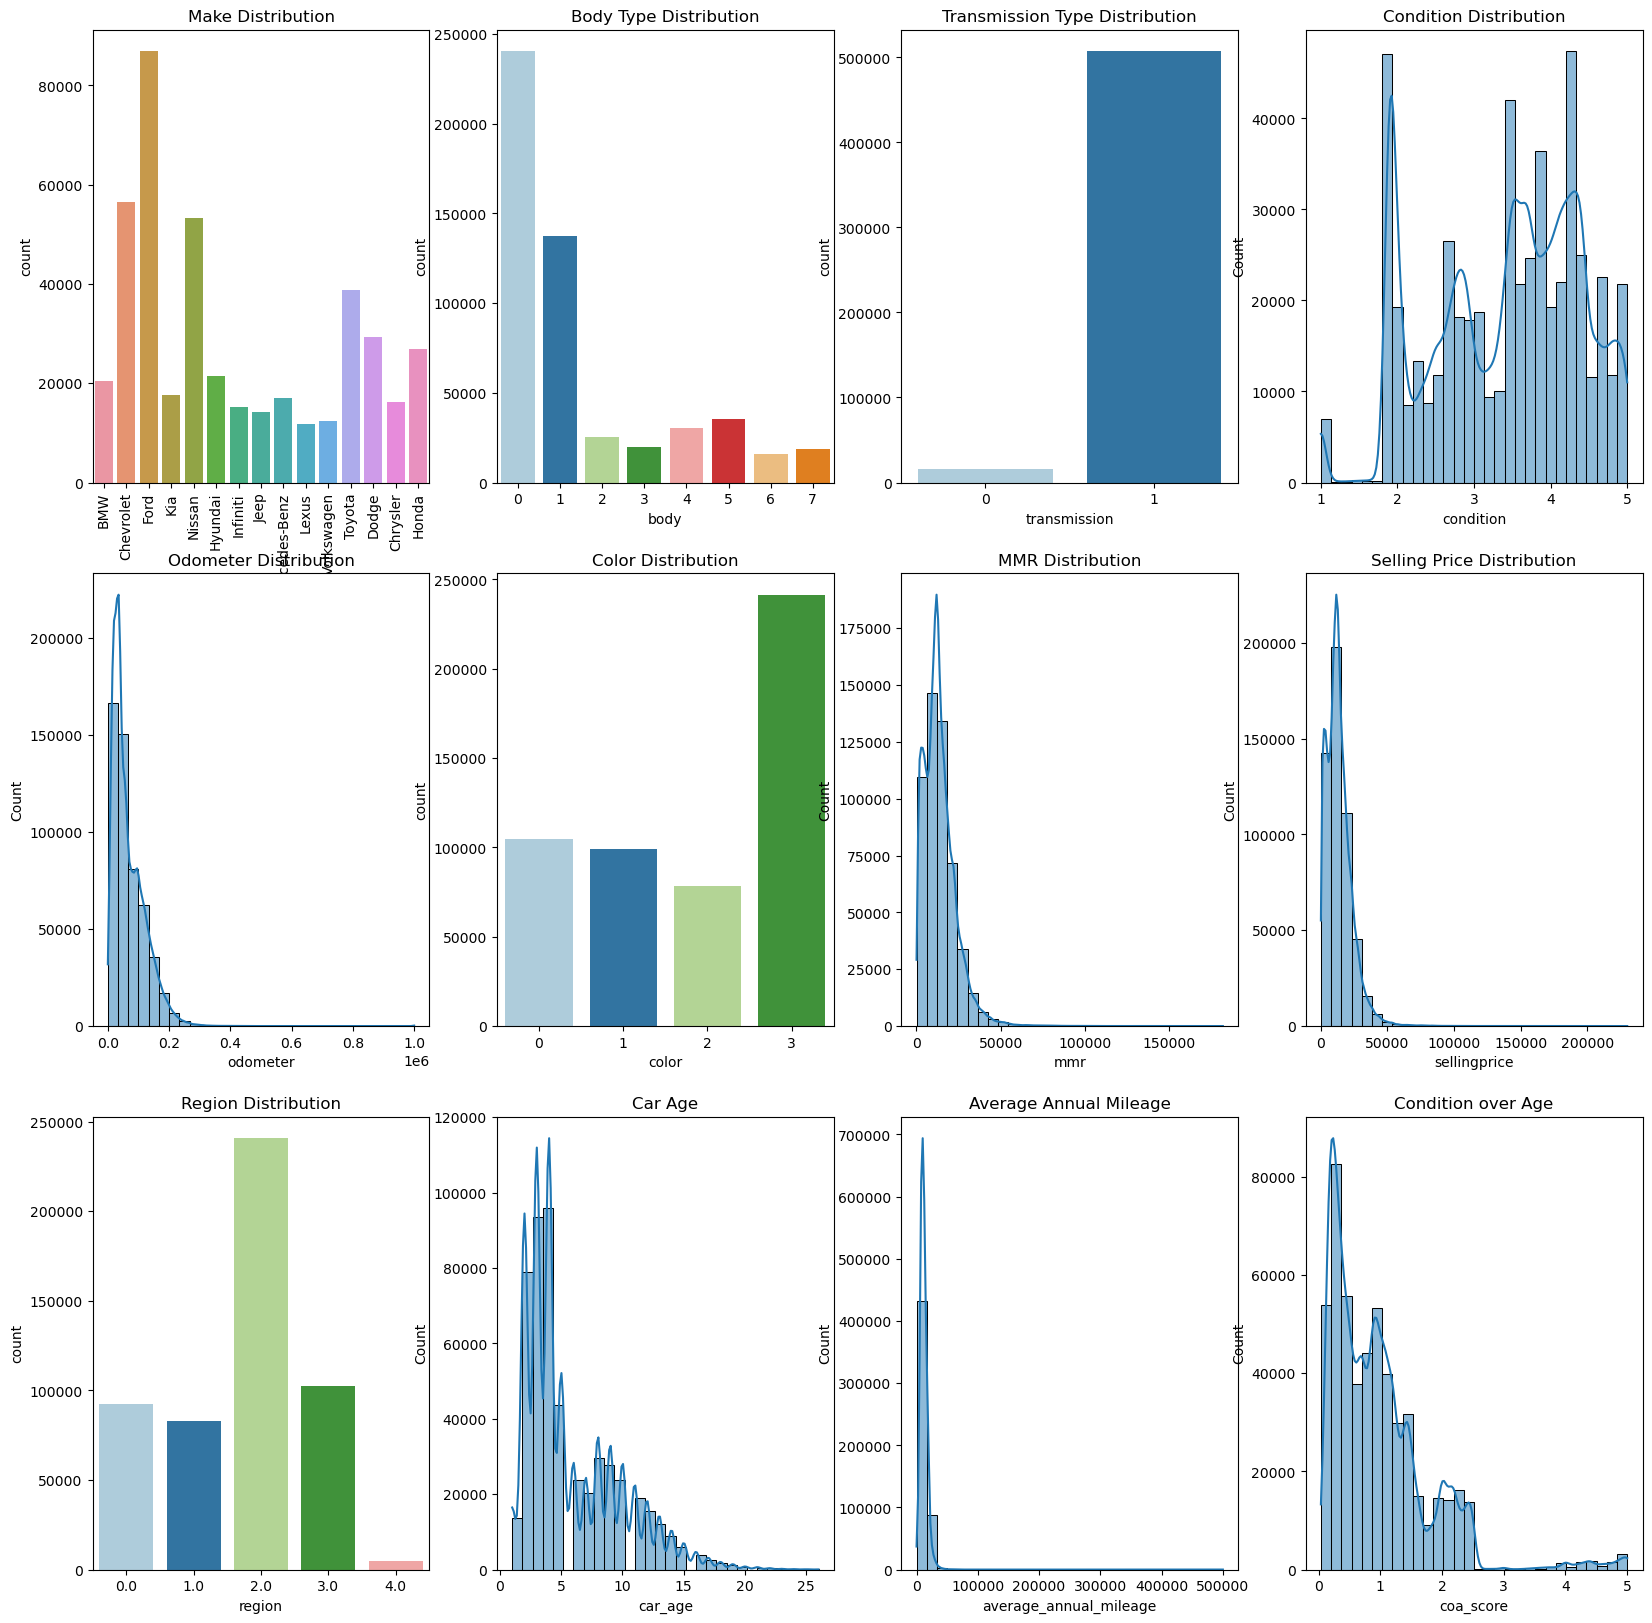

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the top 15 most frequent makes
top_makes = car_df_cleaned['make'].value_counts().nlargest(15).index
car_df_cleaned_top_makes = car_df_cleaned[car_df_cleaned['make'].isin(top_makes)]

# Setting up the 4x4 grid for subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 20))

# Setting a consistent color palette
sns.set_palette("Paired")

# Plot 1: Make Distribution
sns.countplot(x='make', data=car_df_cleaned_top_makes, ax=axs[0, 0])
axs[0, 0].set_title('Make Distribution')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot 2: Body Type Distribution
sns.countplot(x='body', data=car_df_cleaned, ax=axs[0, 1])
axs[0, 1].set_title('Body Type Distribution')

# Plot 3: Transmission Type Distribution
sns.countplot(x='transmission', data=car_df_cleaned, ax=axs[0, 2])
axs[0, 2].set_title('Transmission Type Distribution')

# Plot 4: Condition Distribution
sns.histplot(x='condition', data=car_df_cleaned, bins=30, kde=True, ax=axs[0, 3])
axs[0, 3].set_title('Condition Distribution')

# Plot 5: Odometer Distribution
sns.histplot(x='odometer', data=car_df_cleaned, bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Odometer Distribution')

# Plot 6: Color Distribution
sns.countplot(x='color', data=car_df_cleaned, ax=axs[1, 1])
axs[1, 1].set_title('Color Distribution')

# Plot 7: MMR Distribution
sns.histplot(x='mmr', data=car_df_cleaned, bins=30, kde=True, ax=axs[1, 2])
axs[1, 2].set_title('MMR Distribution')

# Plot 8: Selling Price Distribution
sns.histplot(x='sellingprice', data=car_df_cleaned, bins=30, kde=True, ax=axs[1, 3])
axs[1, 3].set_title('Selling Price Distribution')

# Plot 9: Region Distribution
sns.countplot(x='region', data=car_df_cleaned, ax=axs[2, 0])
axs[2, 0].set_title('Region Distribution')

# Plot 10: Car Age Distribution
sns.histplot(x="car_age", data=car_df_cleaned, bins=30, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Car Age')

# Plot 11: Mileage Distribution
sns.histplot(x="average_annual_mileage", data=car_df_cleaned, bins=30, kde=True, ax=axs[2, 2])
axs[2, 2].set_title('Average Annual Mileage')

# Plot 12: Condition over Age Distribution
sns.histplot(x="coa_score", data=car_df_cleaned, bins=30, kde=True, ax=axs[2, 3])
axs[2, 3].set_title('Condition over Age')

## 1.7. Outlier Detection and Handling

Following our extensive visual analysis, it's become clear that the presence of outliers can significantly skew our understanding and interpretation of the data. To address this, we implement a systematic approach to identify and remove outliers from key variables in our `car_df_cleaned` dataset. 

In [12]:
# Function to calculate outlier percentage for a given column
def calculate_outlier_percentage(column):
    Q1 = car_df_cleaned[column].quantile(0.25)
    Q3 = car_df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = car_df_cleaned[(car_df_cleaned[column] < lower_bound) | (car_df_cleaned[column] > upper_bound)]
    return len(outliers) / len(car_df_cleaned) * 100

# Columns to check for outliers
columns_to_check = ['sellingprice', 'mmr']

# Calculate and print outlier percentages for each column
for column in columns_to_check:
    outlier_percentage = calculate_outlier_percentage(column)
    print(f"Percentage of outliers in {column}: {outlier_percentage:.2f}%")

Percentage of outliers in sellingprice: 2.96%
Percentage of outliers in mmr: 3.01%


### 1.7.1 Dropping the outliers: Here's why and how we are doing this:

### Dropping Outliers in 'sellingprice'
- **Reason**: Outliers in the 'sellingprice' can distort our analysis, particularly in understanding the central tendencies and spread. These extreme values might not represent the general trend and could lead to inaccurate conclusions.
- **Method**: We calculate the Interquartile Range (IQR) and define bounds (1.5 times the IQR from the Q1 and Q3). Data points outside these bounds are considered outliers and are dropped.

### Dropping Outliers in 'mmr'
- **Reason**: Similar to 'sellingprice', outliers in the 'mmr' variable can mislead our analysis of the market's valuation of the cars. Ensuring that our analysis is based on representative market values is crucial.
- **Method**: Using the same IQR approach as with 'sellingprice', we identify and remove extreme values from the 'mmr' variable.

### Dropping Outliers in 'odometer'
- **Reason**: Extremely high odometer readings can be anomalies and might not accurately represent the usage of most cars. Such values can affect the analysis of wear and tear, usage, and valuation.
- **Method**: We set a threshold based on observed statistics (e.g., 999998) to filter out these extreme values.

By cleaning these outliers, our dataset becomes more robust and representative of the typical scenarios encountered in the car market. 

In [13]:
# --- Outlier Detection and Handling --- DROPPING

# Dropping outliers for 'sellingprice'
Q1_sp = car_df_cleaned['sellingprice'].quantile(0.25)
Q3_sp = car_df_cleaned['sellingprice'].quantile(0.75)
IQR_sp = Q3_sp - Q1_sp

# Defining bounds for outliers
lower_bound_sp = Q1_sp - 1.5 * IQR_sp
upper_bound_sp = Q3_sp + 1.5 * IQR_sp

# Dropping rows outside the bounds
car_df_cleaned = car_df_cleaned[(car_df_cleaned['sellingprice'] >= lower_bound_sp) & (car_df_cleaned['sellingprice'] <= upper_bound_sp)]


# Dropping outliers for 'mmr' (Manheim Market Report)
Q1_mmr = car_df_cleaned['mmr'].quantile(0.25)
Q3_mmr = car_df_cleaned['mmr'].quantile(0.75)
IQR_mmr = Q3_mmr - Q1_mmr

# Defining bounds for outliers
lower_bound_mmr = Q1_mmr - 1.5 * IQR_mmr
upper_bound_mmr = Q3_mmr + 1.5 * IQR_mmr

# Dropping rows outside the bounds
car_df_cleaned = car_df_cleaned[(car_df_cleaned['mmr'] >= lower_bound_mmr) & (car_df_cleaned['mmr'] <= upper_bound_mmr)]


# Dropping outliers for 'odometer'
# You can adjust the threshold based on the statistics you observe
threshold_odometer = 999998  # A threshold to minimize outliers

# Filter out the outlier
car_df_cleaned = car_df_cleaned[car_df_cleaned['odometer'] < threshold_odometer]

## 1.8.1 Final Data Visualization (After Dropping the Outliers)

Text(0.5, 1.0, 'Condition over Age')

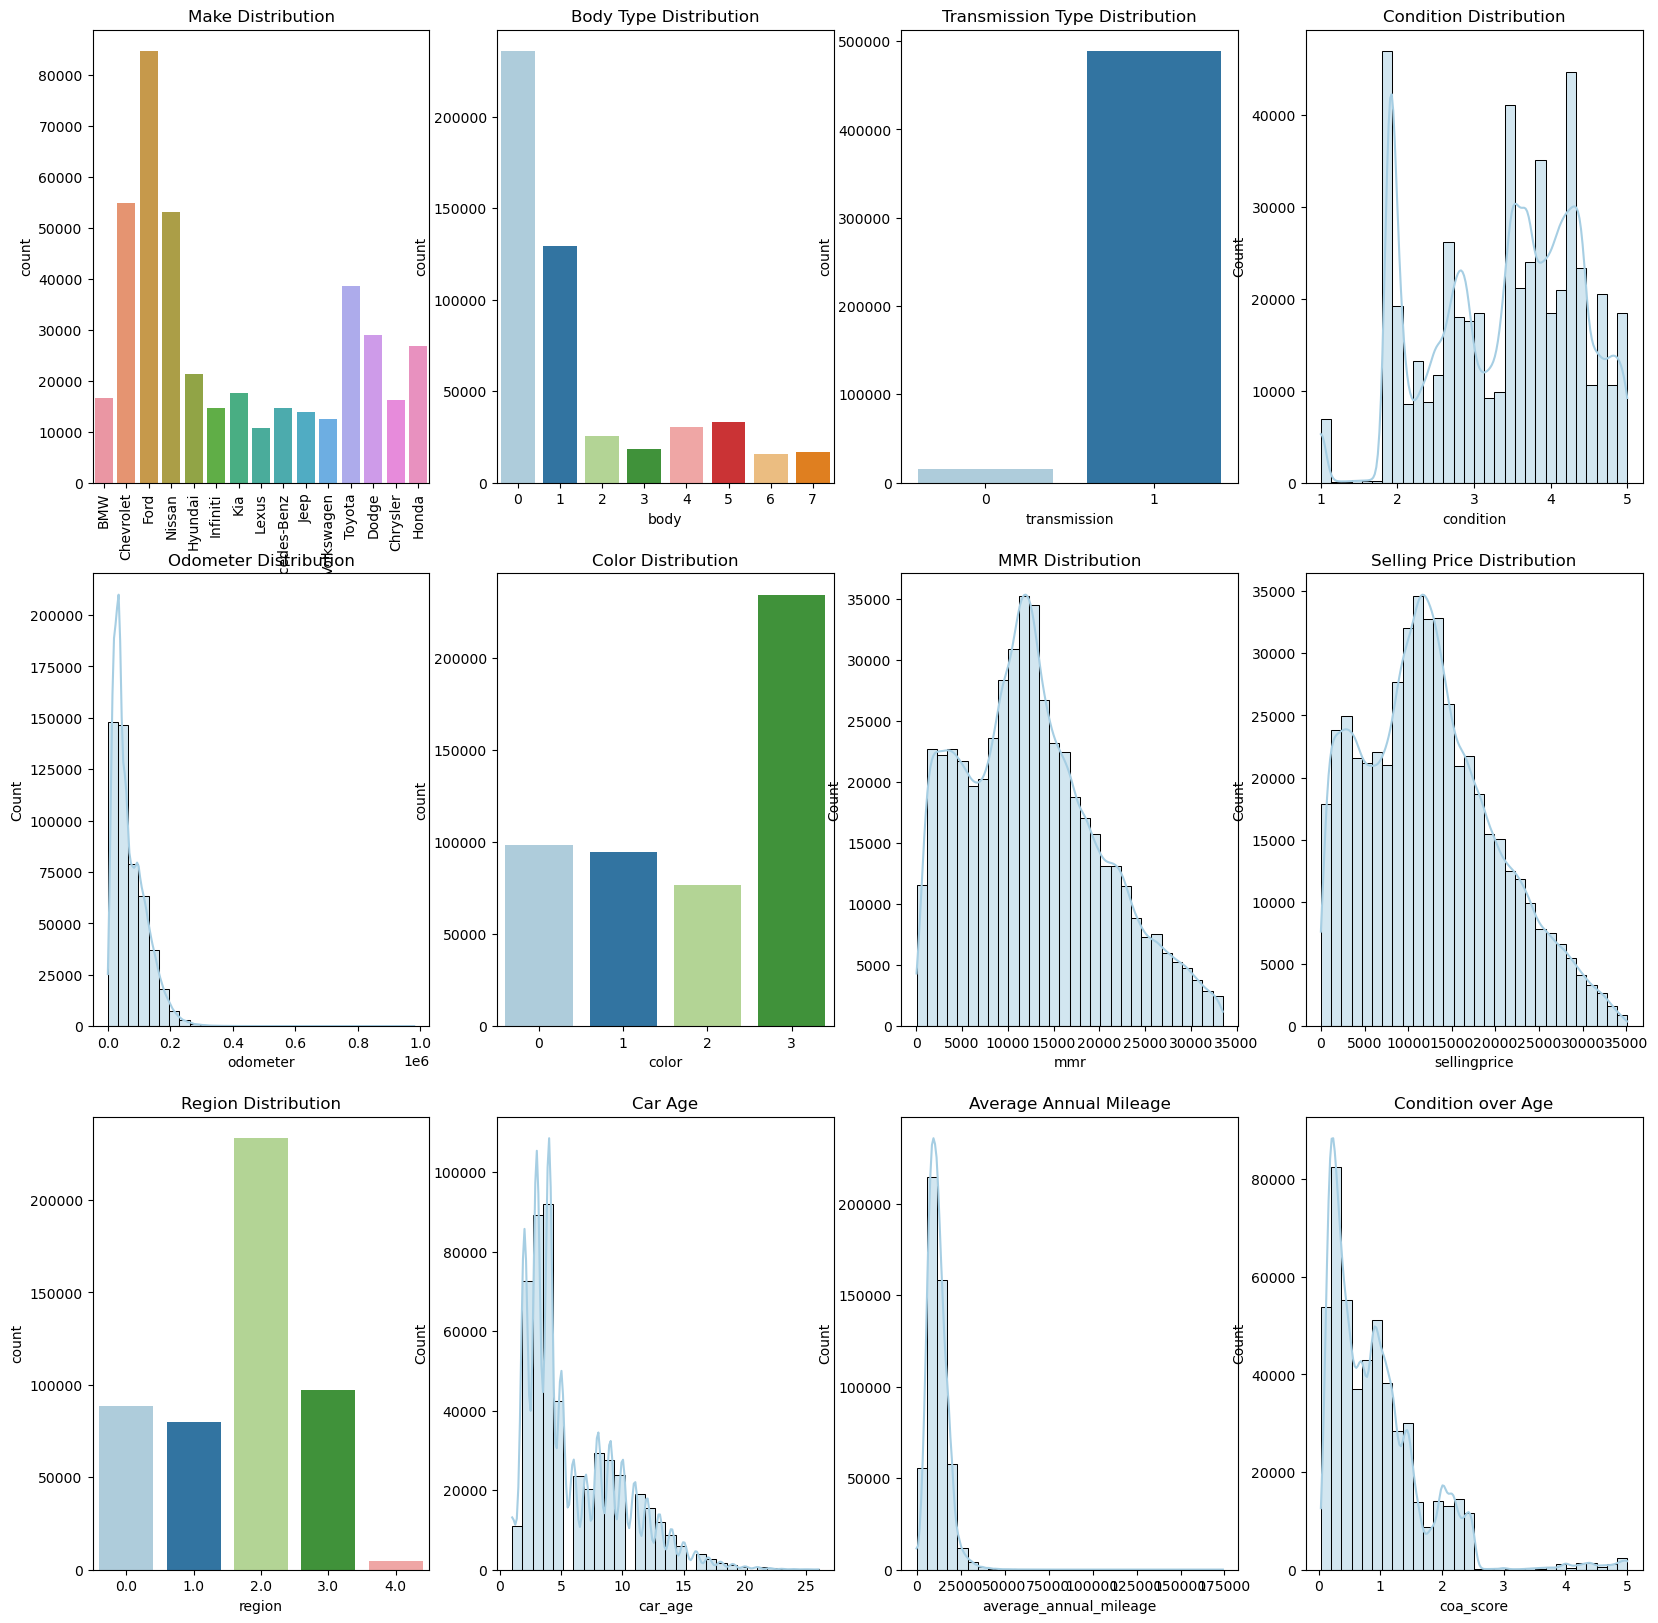

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the top 15 most frequent makes
top_makes = car_df_cleaned['make'].value_counts().nlargest(15).index
car_df_cleaned_top_makes = car_df_cleaned[car_df_cleaned['make'].isin(top_makes)]

# Setting up the 4x4 grid for subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 20))

# Setting a consistent color palette
sns.set_palette("Paired")

# Plot 1: Make Distribution
sns.countplot(x='make', data=car_df_cleaned_top_makes, ax=axs[0, 0])
axs[0, 0].set_title('Make Distribution')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot 2: Body Type Distribution
sns.countplot(x='body', data=car_df_cleaned, ax=axs[0, 1])
axs[0, 1].set_title('Body Type Distribution')

# Plot 3: Transmission Type Distribution
sns.countplot(x='transmission', data=car_df_cleaned, ax=axs[0, 2])
axs[0, 2].set_title('Transmission Type Distribution')

# Plot 4: Condition Distribution
sns.histplot(x='condition', data=car_df_cleaned, bins=30, kde=True, ax=axs[0, 3])
axs[0, 3].set_title('Condition Distribution')

# Plot 5: Odometer Distribution
sns.histplot(x='odometer', data=car_df_cleaned, bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Odometer Distribution')

# Plot 6: Color Distribution
sns.countplot(x='color', data=car_df_cleaned, ax=axs[1, 1])
axs[1, 1].set_title('Color Distribution')

# Plot 7: MMR Distribution
sns.histplot(x='mmr', data=car_df_cleaned, bins=30, kde=True, ax=axs[1, 2])
axs[1, 2].set_title('MMR Distribution')

# Plot 8: Selling Price Distribution
sns.histplot(x='sellingprice', data=car_df_cleaned, bins=30, kde=True, ax=axs[1, 3])
axs[1, 3].set_title('Selling Price Distribution')

# Plot 9: Region Distribution
sns.countplot(x='region', data=car_df_cleaned, ax=axs[2, 0])
axs[2, 0].set_title('Region Distribution')

# Plot 10: Car Age Distribution
sns.histplot(x="car_age", data=car_df_cleaned, bins=30, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Car Age')

# Plot 11: Mileage Distribution
sns.histplot(x="average_annual_mileage", data=car_df_cleaned, bins=30, kde=True, ax=axs[2, 2])
axs[2, 2].set_title('Average Annual Mileage')

# Plot 12: Condition over Age Distribution
sns.histplot(x="coa_score", data=car_df_cleaned, bins=30, kde=True, ax=axs[2, 3])
axs[2, 3].set_title('Condition over Age')

## 1.8.2 Advanced Car Data Visualizations

In section 1.8.2, we extend our data exploration by employing a 5x5 grid to display a series of advanced visualizations. This approach allows us to examine more intricate relationships and distributions within the `car_df_cleaned` dataset:

1. **Distribution of Selling Prices (Up to $55,000)**: This histogram provides a detailed view of the selling prices, focusing on cars priced up to $55,000. It's crucial for understanding the price range most cars fall into.
2. **Count of Car Age**: This plot shows the number of cars at different ages, giving insights into the distribution of car ages in the dataset.
3. **Car Age vs. Selling Price**: A scatter plot that explores the relationship between the age of the cars and their selling prices, highlighting how age might affect a car's market value.
4. **Odometer vs. Selling Price (limited to 300,000)**: Examines the relationship between odometer readings (up to 300,000) and selling prices, providing insights into how usage impacts value.
5. **MMR vs. Selling Price**: A scatter plot comparing the Manheim Market Report (MMR) values against selling prices, useful for assessing market value correlations.
6. **Condition vs. Selling Price**: This box plot explores how different conditions of cars influence their selling prices.
7. **Color vs. Selling Price**: A box plot analyzing the impact of car color on the selling price, revealing any potential trends or preferences in color.
8. **Region vs. Selling Price**: Investigates the variations in selling prices across different regions.
9. **Body Type vs. Selling Price**: This plot examines how different body types of cars correlate with their selling prices.
10. **Car Age vs. Odometer (limited to 300,000)**: A scatter plot showing the relationship between car age and odometer readings, focusing on cars with less than 300,000 mileage.
11. **Car Age vs. Odometer**: Similar to plot 10, but without the mileage limitation, offering a broader view of the relationship.
12. **Transmission vs. Selling Price**: A box plot that explores how the type of transmission impacts the selling price of the cars.
13. **Count of Each Color**: A bar plot showing the frequency of each color within the dataset, indicating popular car colors.
14. **Count of Each Transmission**: This plot displays the distribution of different transmission types in the dataset.
15. **Car Age vs. Selling Price (Line Plot)**: A line plot illustrating the trend of selling prices over different car ages.
16. **Condition vs. Odometer**: Examines the relationship between the condition rating of cars and their odometer readings.
17. **Average Annual Mileage vs. Selling Price**: A scatter plot that explores the impact of average annual mileage on the selling price of cars.
18. **Coa Score vs. Selling Price**: Investigates how the condition score (coa_score) correlates with selling prices.
19. **Car Age vs. Coa Score**: A scatter plot that shows the relationship between car age and the condition score, potentially revealing how age affects perceived condition.
20. **Car Age vs. Average Annual Mileage**: Analyzes the correlation between car age and average annual mileage.
21. **Average Annual Mileage Distribution**: A histogram showing the distribution of average annual mileage across cars.
22. **Coa Score Distribution**: Visualizes the distribution of condition scores in the dataset.

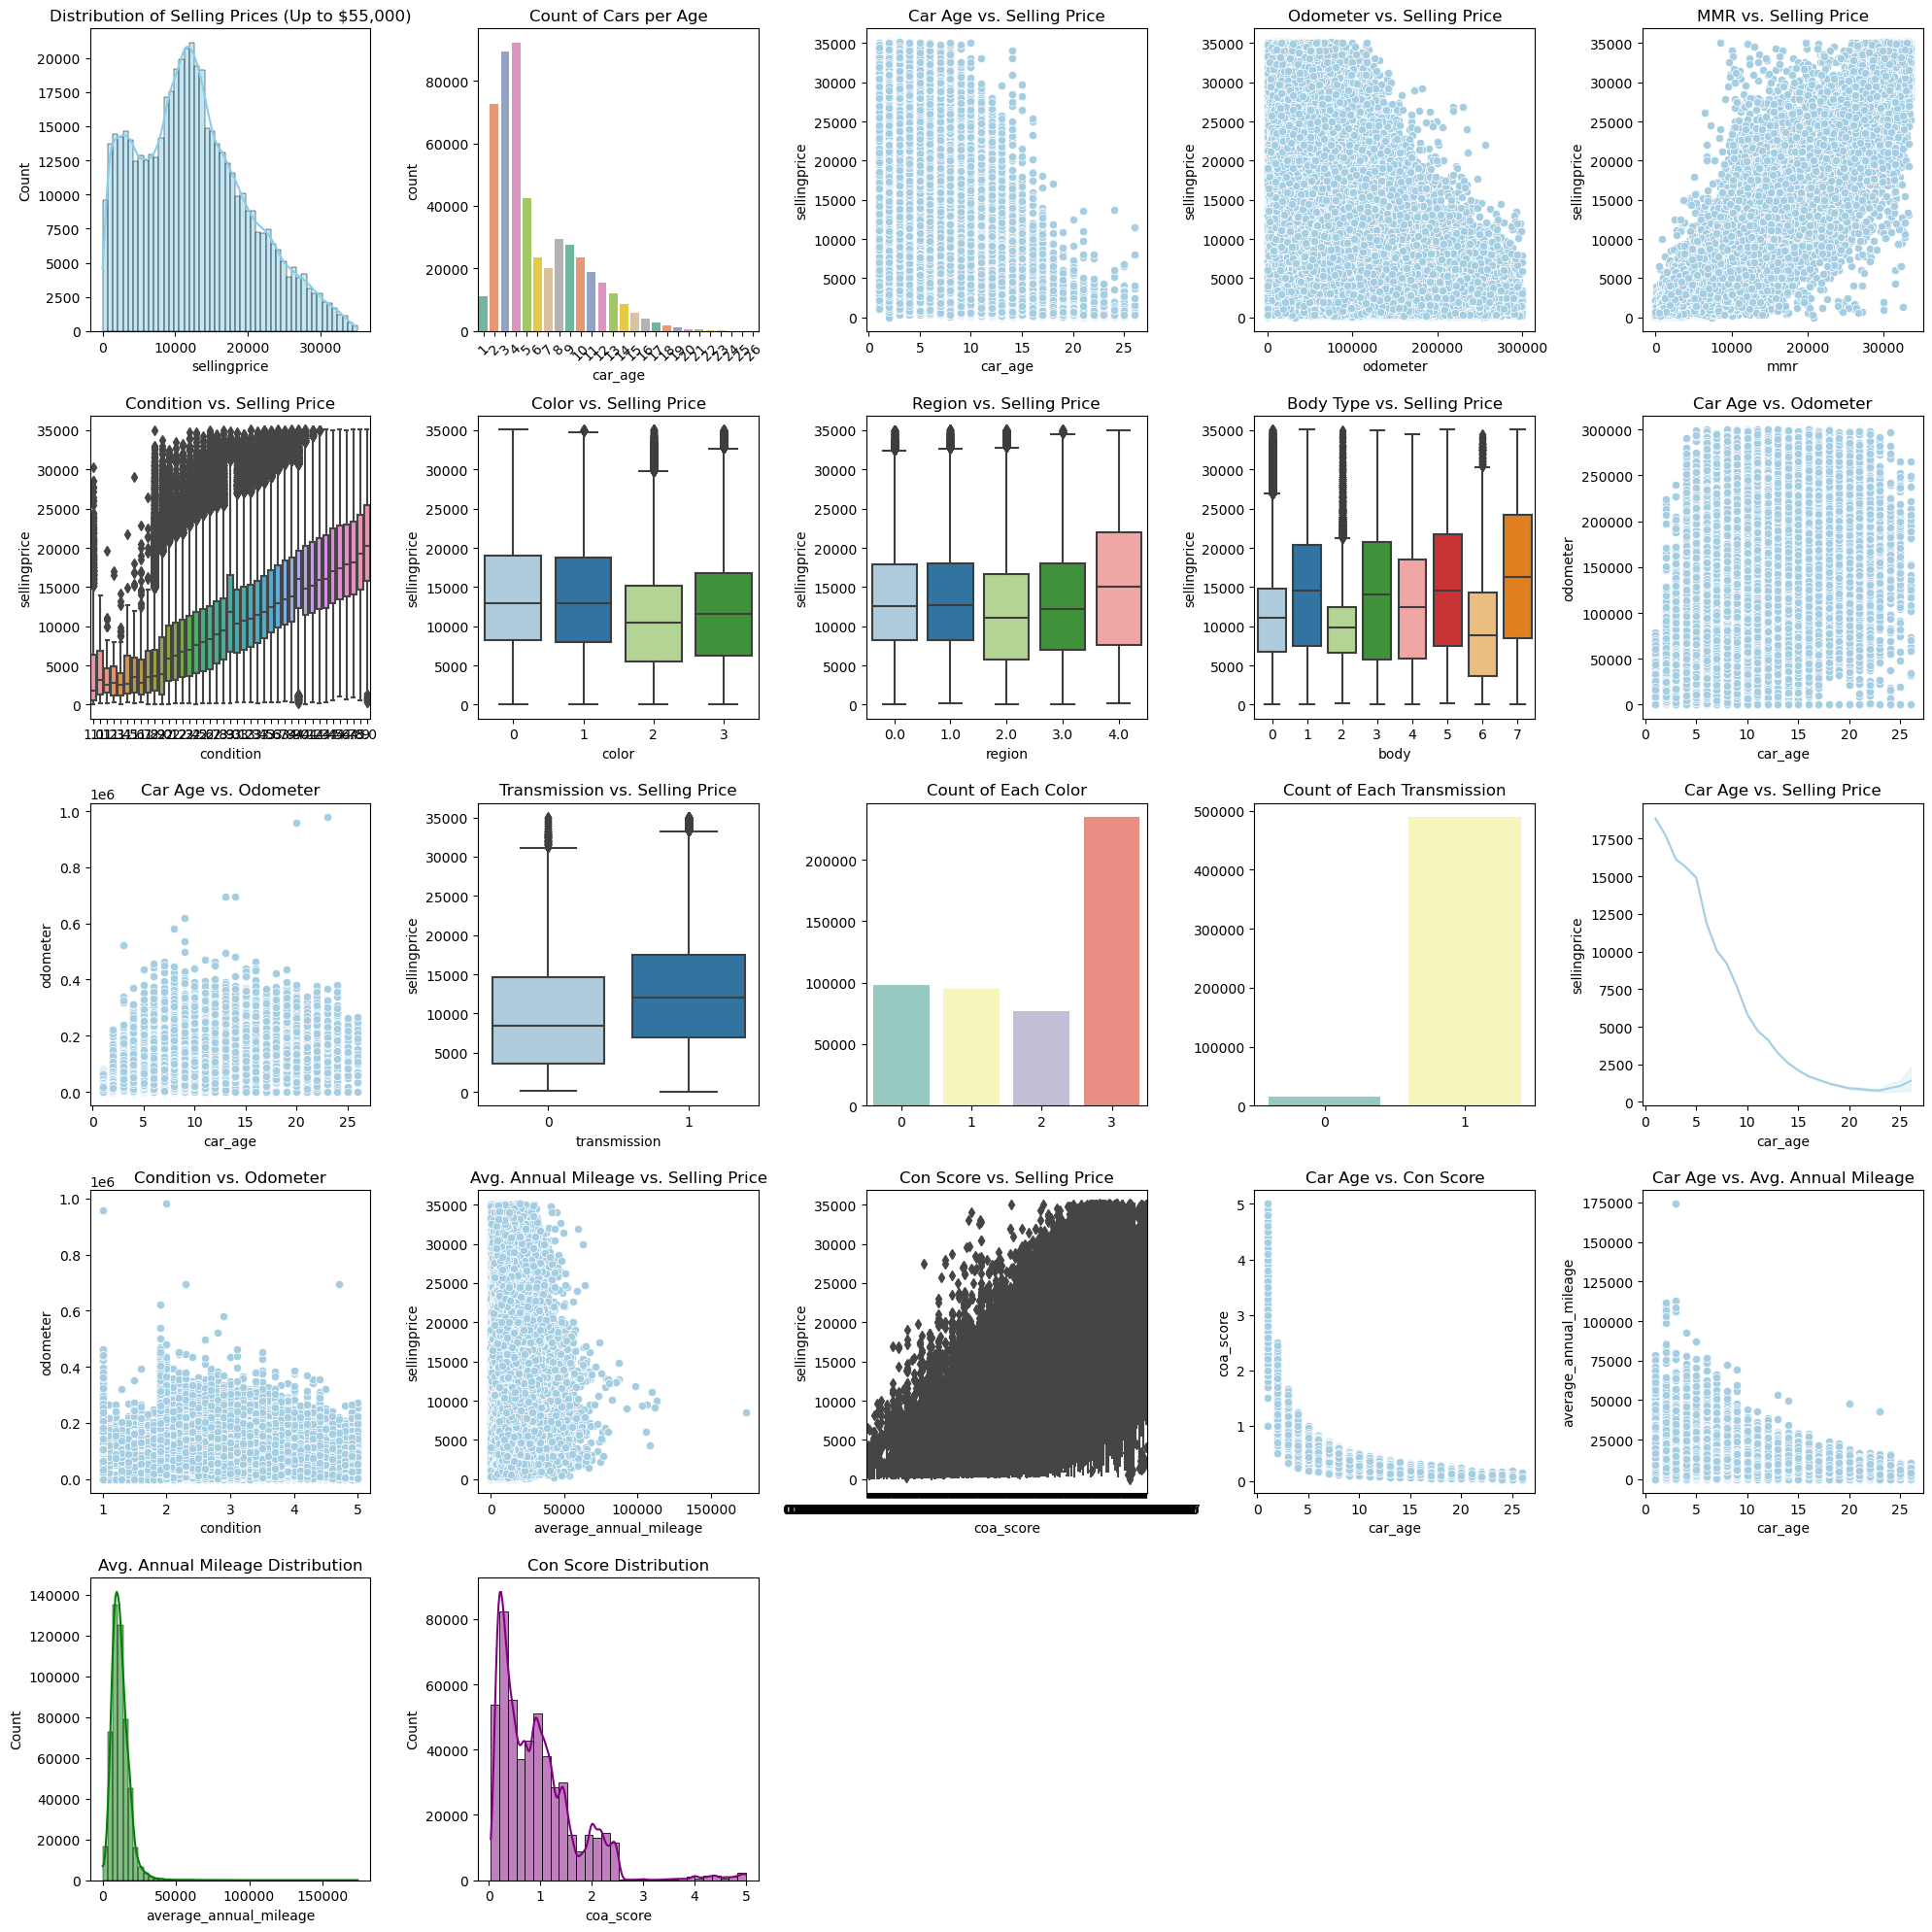

In [15]:
# Creating a 5x5 grid of plots with the requested visualizations

# Setting up the 5x5 grid for subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# Setting a consistent color palette
sns.set_palette("Paired")

# Plot 1: Distribution of Selling Prices (Up to $55,000)
sns.histplot(car_df_cleaned['sellingprice'], bins=50, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Selling Prices (Up to $55,000)')

# Plot 2: Count of Car age
sns.countplot(x='car_age', data=car_df_cleaned, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Count of Cars per Age')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Car Age vs. Selling Price
sns.scatterplot(data=car_df_cleaned, x='car_age', y='sellingprice', ax=axs[0, 2])
axs[0, 2].set_title('Car Age vs. Selling Price')

# Plot 4: Odometer (limited to 300,000) vs. Selling Price
sns.scatterplot(data=car_df_cleaned[car_df_cleaned['odometer'] < 300000], x='odometer', y='sellingprice', ax=axs[0, 3])
axs[0, 3].set_title('Odometer vs. Selling Price')

# Plot 5: MMR vs. Selling Price
sns.scatterplot(data=car_df_cleaned, x='mmr', y='sellingprice', ax=axs[0, 4])
axs[0, 4].set_title('MMR vs. Selling Price')

# Plot 6: Condition vs. Selling Price
sns.boxplot(data=car_df_cleaned, x='condition', y='sellingprice', ax=axs[1, 0])
axs[1, 0].set_title('Condition vs. Selling Price')

# Plot 7: Color vs. Selling Price
sns.boxplot(data=car_df_cleaned, x='color', y='sellingprice', ax=axs[1, 1])
axs[1, 1].set_title('Color vs. Selling Price')

# Plot 8: Region vs. Selling Price
sns.boxplot(data=car_df_cleaned, x='region', y='sellingprice', ax=axs[1, 2])
axs[1, 2].set_title('Region vs. Selling Price')

# Plot 9: Body Type vs. Selling Price
sns.boxplot(data=car_df_cleaned, x='body', y='sellingprice', ax=axs[1, 3])
axs[1, 3].set_title('Body Type vs. Selling Price')

# Plot 10: Car Age vs. Odometer (limited to 300,000)
sns.scatterplot(data=car_df_cleaned[car_df_cleaned['odometer'] < 300000], x='car_age', y='odometer', ax=axs[1, 4])
axs[1, 4].set_title('Car Age vs. Odometer')

# Plot 11: Car Age vs. Odometer
sns.scatterplot(data=car_df_cleaned, x='car_age', y='odometer', ax=axs[2, 0])
axs[2, 0].set_title('Car Age vs. Odometer')

# Plot 12: Transmission vs. Selling Price
sns.boxplot(data=car_df_cleaned, x='transmission', y='sellingprice', ax=axs[2, 1])
axs[2, 1].set_title('Transmission vs. Selling Price')

# Plot 13: Count of Each Color
color_counts = car_df_cleaned['color'].value_counts()
sns.barplot(x=color_counts.index, y=color_counts.values, palette='Set3', ax=axs[2, 2])
axs[2, 2].set_title('Count of Each Color')

# Plot 14: Count of Each Transmission
transmission_counts = car_df_cleaned['transmission'].value_counts()
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='Set3', ax=axs[2, 3])
axs[2, 3].set_title('Count of Each Transmission')

# Plot 15: Car Age vs. Selling Price
sns.lineplot(data=car_df_cleaned, x='car_age', y='sellingprice', ax=axs[2, 4])
axs[2, 4].set_title('Car Age vs. Selling Price')

# Plot 16: Additional Visualization (e.g., Condition vs. Odometer)
# This plot shows the relationship between the condition of the car and its odometer reading.
sns.scatterplot(data=car_df_cleaned, x='condition', y='odometer', ax=axs[3, 0])
axs[3, 0].set_title('Condition vs. Odometer')

# Plot 17: Average Annual Mileage vs. Selling Price
sns.scatterplot(data=car_df_cleaned, x='average_annual_mileage', y='sellingprice', ax=axs[3, 1])
axs[3, 1].set_title('Avg. Annual Mileage vs. Selling Price')

# Plot 18: Con Score vs. Selling Price
sns.boxplot(data=car_df_cleaned, x='coa_score', y='sellingprice', ax=axs[3, 2])
axs[3, 2].set_title('Con Score vs. Selling Price')

# Plot 19: Car Age vs. Con Score
sns.scatterplot(data=car_df_cleaned, x='car_age', y='coa_score', ax=axs[3, 3])
axs[3, 3].set_title('Car Age vs. Con Score')

# Plot 20: Car Age vs. Average Annual Mileage
sns.scatterplot(data=car_df_cleaned, x='car_age', y='average_annual_mileage', ax=axs[3, 4])
axs[3, 4].set_title('Car Age vs. Avg. Annual Mileage')

# Plot 21: Average Annual Mileage Distribution
sns.histplot(car_df_cleaned['average_annual_mileage'], bins=50, kde=True, color='green', ax=axs[4, 0])
axs[4, 0].set_title('Avg. Annual Mileage Distribution')

# Plot 22: Con Score Distribution
sns.histplot(car_df_cleaned['coa_score'], bins=30, kde=True, color='purple', ax=axs[4, 1])
axs[4, 1].set_title('Con Score Distribution')
# Hide unused subplots
for i in range(22, 25):
    axs.flat[i].set_visible(False)

# Adjusting layout for clarity
plt.tight_layout()

# Display the plots
plt.show()


### Detailed Insights from Visual Analysis

#### Plot 1: Distribution of Selling Prices (Up to $55,000)
- The histogram reveals a skewed distribution towards the lower end, suggesting that a significant portion of the market consists of budget-friendly vehicles.
- The presence of a long tail towards the higher price range indicates fewer luxury or high-end cars in the dataset.

#### Plot 2: Count of Cars per Year (Since 2000)
- The bar plot shows fluctuations in the number of cars sold each year, possibly correlating with economic cycles, changes in consumer preferences, or industry trends.
- A noticeable increase in car counts around 2012-2013 might reflect an industry boom or the introduction of popular car models.

#### Plot 3: Year vs. Selling Price
- The scatter plot demonstrates an expected trend where newer cars tend to sell for higher prices, possibly due to lesser wear and newer technology.
- There is noticeable dispersion in the data, suggesting that factors other than year also significantly impact the selling price.

#### Plot 4: Odometer (Up to 300,000) vs. Selling Price
- A trend where higher odometer readings correlate with lower selling prices, likely due to increased wear and tear.
- Some outliers with high odometer readings but relatively high selling prices might indicate well-maintained or classic vehicles.

#### Plot 5: MMR vs. Selling Price
- A general positive correlation, indicating that higher MMR typically associates with higher selling prices.
- The spread and outliers in the plot suggest that MMR is a good but not perfect predictor of selling price, affected by other factors like condition, brand, or regional trends.

#### Plot 6: Condition vs. Selling Price
- A clear indication that better-condition cars command higher prices, with some outliers showing high prices for lower-condition cars, perhaps due to brand value or rarity.

#### Plot 7: Color vs. Selling Price
- Some variation in price across colors, though the impact seems less pronounced, indicating that while color might influence buyer preferences, it does not significantly impact price.

#### Plot 8: Region vs. Selling Price
- Notable regional differences in selling prices could be driven by regional economic conditions, consumer power, or regional preferences for certain types of cars.

#### Plot 9: Body Type vs. Selling Price
- Certain body types, like SUVs and sedans, might have higher median selling prices, indicating their popularity or perceived value in the market.

#### Plot 10: Year vs. Odometer (Up to 300,000)
- A notable pattern where newer cars have lower odometer readings, as expected. However, the spread increases for older cars, indicating varied usage patterns.

#### Plot 11: Price to MMR Ratio (0 to 15) vs. Selling Price
- The plot shows how selling prices compare to MMR estimations, with most cars selling close to their MMR values but with notable exceptions, which could be due to specific car features or conditions.

#### Plot 12: Transmission vs. Selling Price
- The plot may indicate a preference or higher valuation for certain transmission types, potentially reflecting market trends or driving preferences.

#### Plot 13: Count of Each Color
- The distribution of car colors can reflect popular trends, marketing strategies by manufacturers, or consumer preferences for certain colors.

#### Plot 14: Count of Each Transmission
- This distribution highlights market preferences for transmission types and might correlate with driving conditions, demographics, or economic factors.

#### Plot 15: Years vs. Selling Price
- The line plot shows trends over years, which could reflect market growth, technological advancements in cars, or changing consumer preferences.

#### Plot 16: Condition vs. Odometer
- This plot offers insights into how car usage (as shown by odometer readings) correlates with condition, shedding light on wear and tear patterns.

#### Plot 17: **Average Annual Mileage vs. Selling Price**:
- Generally, higher mileage tends to correlate with lower selling prices, indicating that buyers value lower mileage vehicles.

#### Plot 18: Con Score vs. Selling Price**:
- Cars with higher condition scores usually fetch higher selling prices, emphasizing the importance of vehicle condition in the used car market.

#### Plot 19: Car Age vs. Con Score**:
- Older cars tend to have lower condition scores, suggesting a decline in vehicle condition over time.

#### Plot 20: Car Age vs. Average Annual Mileage**:
- There is a trend where newer cars often have lower annual mileage, which could reflect less usage or shorter ownership periods.

#### Plot 21: Average Annual Mileage Distribution**:
- The distribution shows a concentration in lower mileage ranges, indicating that cars with less usage are more common in the market.

#### Plot 22: Con Score Distribution**:
- The distribution leans towards higher condition scores, suggesting that a majority of cars in the market are in relatively good condition.




## 1.9 Final Step of Exploratory Data Analysis: Statistical Testing for Parameter Choosing

In this final phase of our Exploratory Data Analysis (EDA) for the `car_df_cleaned` dataset, we employ a series of statistical tests to deepen our understanding of the data's underlying structure and relationships. This step is crucial for several reasons:

1. **Assessing Normality (Shapiro-Wilk Test)**: Understanding whether the data follows a normal distribution is fundamental in EDA. Many statistical methods assume normality in the data, and knowing this helps in choosing the appropriate tests and models for further analysis.

2. **Examining Group Differences (Kruskal-Wallis Test)**: For our categorical variables, it's important to determine if there are statistically significant differences in the selling prices across different categories. This test is non-parametric and does not assume a normal distribution, making it ideal for our analysis.

3. **Understanding Correlations**: By calculating correlation coefficients, we can quantify the strength and direction of the relationships between numerical variables and the selling price. This aids in identifying potential predictors for more complex analyses like regression modeling.

**Objective**:
- The primary aim is to validate assumptions about our data, identify significant variables, and discern patterns that could be pivotal for predictive modeling.
- These tests will guide us in our subsequent steps, ensuring that our models and predictions are based on sound statistical principles and a thorough understanding of the dataset.

**Significance**:
- This approach not only reinforces the findings from our initial visual explorations but also grounds our hypotheses and observations in statistical evidence.
- The results will potentially reveal nuances in the data that might not be immediately apparent through visual analysis alone.

By the end of this section, we will have a comprehensive statistical overview of our dataset, setting a solid foundation for any advanced analytical techniques that follow.


In [20]:
from scipy import stats

# Function to determine if a column is categorical or numerical
def is_categorical(series, threshold=10):
    return series.nunique() < threshold or series.dtype == 'object'

# Separating columns into categorical and numerical
categorical_columns = [col for col in car_df_cleaned.columns if is_categorical(car_df_cleaned[col]) and col != 'make']
numerical_columns = [col for col in car_df_cleaned.columns if not is_categorical(car_df_cleaned[col]) and col != 'make']

# Printing the lists of categorical and numerical columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

# Kruskal-Wallis Test for categorical variables
kruskal_results = {}
for column in categorical_columns:
    stat, p_value = stats.kruskal(*[group['sellingprice'].values for name, group in car_df_cleaned.groupby(column)])
    kruskal_results[column] = {'Statistic': stat, 'P-Value': p_value}

# Correlation for numerical variables
correlation_results = {column: car_df_cleaned[column].corr(car_df_cleaned['sellingprice']) for column in numerical_columns}

# Shapiro-Wilk Test for numerical variables
shapiro_results = {}
for column in numerical_columns:
    stat, p_value = stats.shapiro(car_df_cleaned[column])
    shapiro_results[column] = {'Statistic': stat, 'P-Value': p_value}

# Printing the results of the tests
print("\nKruskal-Wallis Test Results:")
for column, result in kruskal_results.items():
    print(f"{column}: Statistic = {result['Statistic']}, P-Value = {result['P-Value']}")

print("\nCorrelation Coefficients:")
for column, corr in correlation_results.items():
    print(f"{column}: {corr}")

print("\nShapiro-Wilk Test Results:")
for column, result in shapiro_results.items():
    print(f"{column}: Statistic = {result['Statistic']}, P-Value = {result['P-Value']}")


Categorical Columns: ['body', 'transmission', 'condition', 'color', 'region', 'coa_score']
Numerical Columns: ['odometer', 'mmr', 'sellingprice', 'car_age', 'average_annual_mileage']

Kruskal-Wallis Test Results:
body: Statistic = 23220.344462747387, P-Value = 0.0
transmission: Statistic = 2257.994973057299, P-Value = 0.0
condition: Statistic = 190655.14116835198, P-Value = 0.0
color: Statistic = 7616.632985943467, P-Value = 0.0
region: Statistic = 4687.667210626239, P-Value = 0.0
coa_score: Statistic = 292400.8151394845, P-Value = 0.0

Correlation Coefficients:
odometer: -0.6534421908964912
mmr: 0.977613073505766
sellingprice: 1.0
car_age: -0.6582236424640889
average_annual_mileage: -0.19011644429960778

Shapiro-Wilk Test Results:
odometer: Statistic = 0.8978843688964844, P-Value = 0.0
mmr: Statistic = 0.9712368249893188, P-Value = 0.0
sellingprice: Statistic = 0.9708186388015747, P-Value = 0.0
car_age: Statistic = 0.8756721615791321, P-Value = 0.0
average_annual_mileage: Statistic = 

c:\Users\alika\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Interpreting Shapiro-Wilk, Kruskal-Wallis Test Results, and Correlation Coefficients

The results from Shapiro-Wilk, Kruskal-Wallis tests, and correlation analysis provide critical insights into the dataset's characteristics:

**Shapiro-Wilk Test Results:**
- `Odometer`: Statistic - 0.8979, P-Value - 0.0. This suggests a non-normal distribution, indicating that odometer readings are not evenly spread.
- `MMR`: Statistic - 0.9712, P-Value - 0.0. Despite a statistic close to 1, the P-Value indicates a non-normal distribution, suggesting the market values do not follow a Gaussian distribution.
- `Car Age`: Statistic - 0.8757, P-Value - 0.0. The distribution of car age is significantly skewed from normal.
- `Average Annual Mileage`: Statistic - 0.9294, P-Value - 0.0. The annual mileage distribution also deviates from normality.

**Kruskal-Wallis Test Results:**
- `Body`, `Transmission`, `Condition`, `Color`, `Region`, and `Coa Score`: All these categorical variables show a P-Value of 0.0 with high test statistics, indicating significant differences in the selling prices across different groups or categories.

**Correlation Coefficients:**
- `Odometer`: -0.6534, indicating a moderate to strong negative correlation with the selling price.
- `MMR`: 0.9776, showing a very strong positive correlation with the selling price.
- `Car Age`: -0.6582, also presenting a moderate to strong negative correlation with the selling price.
- `Average Annual Mileage`: -0.1901, indicating a weak negative correlation with the selling price.

The correlation coefficients highlight the relationships between these numerical variables and the selling price. Notably, `MMR` has a very strong positive correlation, suggesting it is a crucial factor in predicting the selling price.

In [19]:
car_df_cleaned.to_csv('cleaned_car_data_dropped.csv', index=False)
